Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Loading the Data

In [2]:
df = pd.read_csv("Breast_Cancer.csv")

Printing Basic Dimensions of Dataset (Rows, Columns)

In [3]:
print(df.shape)

(569, 33)


Checking for missing values in dataset

In [4]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Printing the Data Types of Each column in the dataset

In [5]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Visualizing the Target Variable

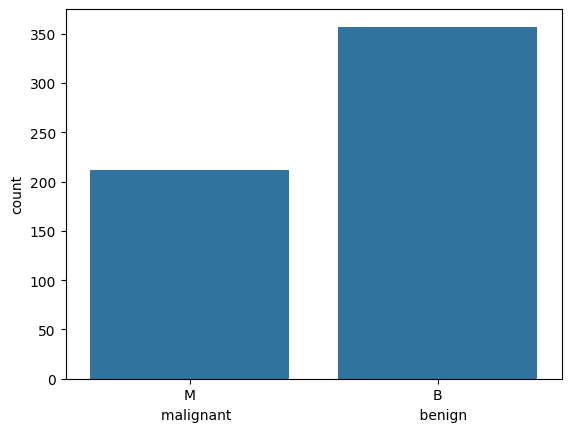

In [7]:
sb.countplot(x='diagnosis', data=df)
plt.xlabel('malignant                                           benign')
# Malignant -> Cancerous | benign -> Non-Cancerous
plt.show()

Preparing the Data for Model Training

In [9]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

Splitting the Data into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Handling Missing Data

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train) # Calculate mean on the training data
# Applying mean to training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


c:\Users\ved\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ved\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Scaling the Features

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the Model

In [13]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train) # Iss line me model train ho rha hai

SVC(kernel='linear')

Making Predictions

In [17]:
# Trainig model ka use krke test dataset pe prediction
y_pred = model.predict(X_test)
# Lets see the predictions
print(y_pred)
# B is benign and M is Malignant

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M']


Evaluating the Model's Accuracy

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# abhi accuracy 0.95 mili hai which is good enough. It can go up to 0.97

Accuracy: 0.956140350877193


Predicting on a New Input

In [19]:
# Lets test for a new data point
xinput = np.array([13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.114,0.1773,0.239,0.1288,0.2977,0.07259])

# Reshapes the array into a 2D array (This is needed for making predictions)
xinput = xinput.reshape(1, -1)

# Predicting the result for our data point
prediction = model.predict(xinput)

print(prediction)
# m = malignant - cancerous
# b = benign - Non-cancerous

['M']
